In [2]:
import numpy as np
import pandas as pd
# Seed the random number generator for reproducibility
#np.random.seed(0)
CO2_df =pd.DataFrame(pd.read_csv("NOAA_MeanCO2.csv"))
CO2_df= CO2_df[CO2_df["Average"] !=-99.99]
CO2_df.head()

,Date,Unnamed: 1,Decimal_date,Average,Interpolated,Trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1
5,1958,8,1958.625,314.93,314.93,315.94,-1


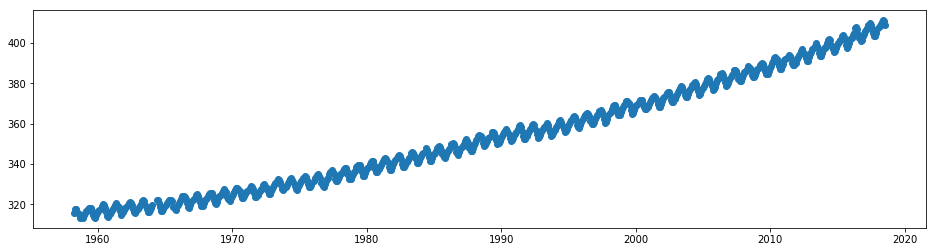

In [3]:
#df[df['column name'].map(len) < 2]
#df.drop(df[df.score < 50].index)
x_data = CO2_df['Decimal_date']
y_data = CO2_df['Average']

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))
plt.scatter(x_data, y_data)
plt.show()

In [6]:
from scipy import optimize

def test_func(x, a, b, c, d):
    return a * np.sin( b* x) + (x*c^2)+d

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                              )

print(params)

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [7]:
from scipy import optimize

def test_func(x, a, b, c):
    return a * np.sin( 12* x) + b+(c*x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                              )

print(params)

[  5.57700662e-03  -2.73277545e+03   1.55213897e+00]


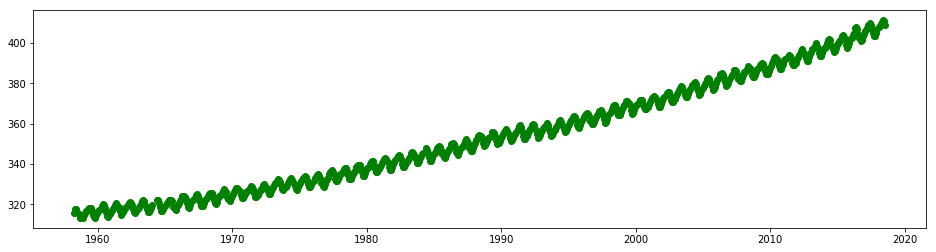

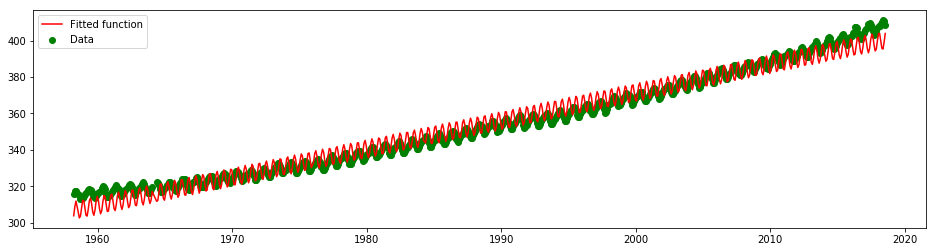

In [11]:
plt.figure(figsize=(16, 4))
plt.scatter(x_data, y_data, color='green',label='Data')
plt.plot(x_data, test_func(x_data, 5, params[1], params[2],),
         label='Fitted function', color='red')

plt.legend(loc='best')

plt.show()
